In [259]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# For measuring our models performance
from sklearn import metrics
from time import time

# Import various model stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

import statsmodels

In [752]:
df = pd.read_csv('Swan_Project_Data.csv')

In [395]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [396]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [397]:
df.shape

(7043, 31)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [399]:
has_empty_string = (df['Total Charges'] == ' ').any()

In [400]:
has_empty_string

True

In [401]:
empty_string_indices = df[df['Total Charges'] == ' '].index

In [402]:
empty_string_indices

Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

In [403]:
df[df['Tenure Months'] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Yes,No,Two year,No,Mailed check,73.35,,No,0,NaN


In [404]:
row = df.loc[2234]
row

CustomerID                          4472-LVYGI
Count                                        1
Country                          United States
State                               California
City                            San Bernardino
Zip Code                                 92408
Lat Long                34.084909, -117.258107
Latitude                             34.084909
Longitude                          -117.258107
Gender                                  Female
Senior Citizen                              No
Partner                                    Yes
Dependents                                  No
Tenure Months                                0
Phone Service                               No
Multiple Lines                No phone service
Internet Service                           DSL
Online Security                            Yes
Online Backup                               No
Device Protection                          Yes
Tech Support                               Yes
Streaming TV 

In [405]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [406]:
df['Total Charges'] = df['Total Charges'].fillna(value = 0)

In [407]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [408]:
df['Monthly Charges'] == df['Total Charges'] / df['Tenure Months']

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [409]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [410]:
contract_totals = df['Contract'].value_counts().reset_index()

In [411]:
contract_totals

,Contract,count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


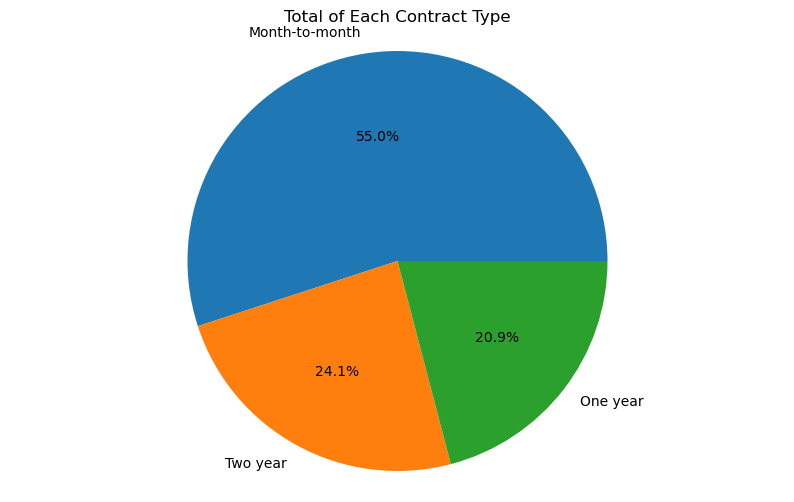

In [412]:
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(contract_totals['count'], labels=contract_totals['Contract'], autopct='%1.1f%%')

# Customize the plot
plt.title('Total of Each Contract Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

/var/folders/md/qszqkzy929909bzx2dgdwr_h0000gn/T/ipykernel_96668/3018866986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_totals, x = 'Contract', y = 'count', palette = 'autumn_r')


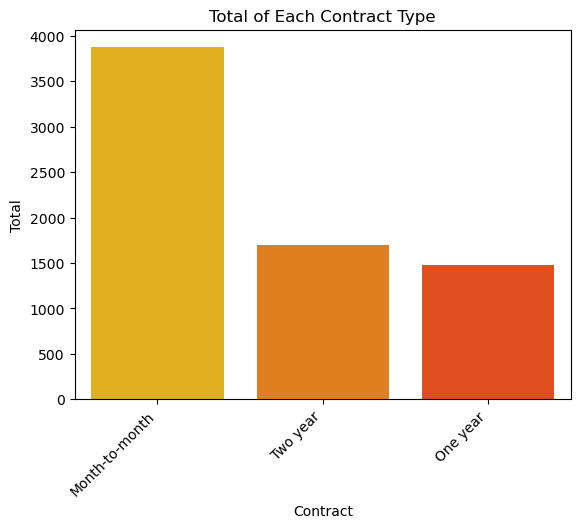

In [413]:
sns.barplot(data=contract_totals, x = 'Contract', y = 'count', palette = 'autumn_r')
plt.title('Total of Each Contract Type')
plt.xlabel('Contract')
plt.ylabel('Total')
plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium'
          )
plt.show()

In [414]:
payment_totals = df['Payment Method'].value_counts().reset_index()

In [415]:
payment_totals

,Payment Method,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


/var/folders/md/qszqkzy929909bzx2dgdwr_h0000gn/T/ipykernel_96668/2038200144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_totals, x = 'Payment Method', y = 'count', palette = 'viridis')


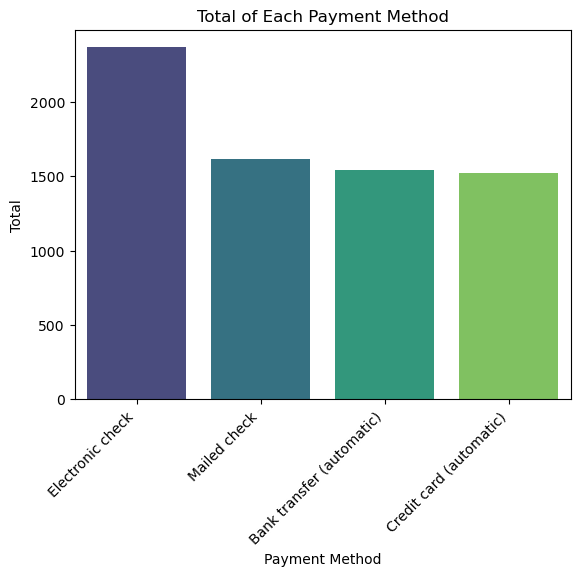

In [416]:
sns.barplot(data=payment_totals, x = 'Payment Method', y = 'count', palette = 'viridis')
plt.title('Total of Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total')
plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium'
          )
plt.show()

In [417]:
# list of columns with yes's and no's
yn_cols = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
# mapping
for col in yn_cols:
    df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No internet service':0, 'No phone service':0, 'Male':1, 'Female':0})
    #df[f'{col}'].astype(int)
    
# check thats all they have
for col in yn_cols:
    print(f'The column {col} contains these values {df[col].unique()}')

The column Gender contains these values [1 0]
The column Senior Citizen contains these values [0 1]
The column Partner contains these values [0 1]
The column Dependents contains these values [0 1]
The column Phone Service contains these values [1 0]
The column Multiple Lines contains these values [0 1]
The column Online Security contains these values [1 0]
The column Online Backup contains these values [1 0]
The column Device Protection contains these values [0 1]
The column Tech Support contains these values [0 1]
The column Streaming TV contains these values [0 1]
The column Streaming Movies contains these values [0 1]
The column Paperless Billing contains these values [1 0]


In [418]:
df.corr(numeric_only=True)

,Count,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.895743,-0.784271,0.015493,-0.006635,-0.006503,0.008597,0.001041,-0.005295,...,0.003152,-0.005120,0.005508,0.010445,0.004931,0.003731,-0.011765,-0.004596,-0.000884,0.003346
Latitude,NaN,0.895743,1.000000,-0.876779,0.008592,-0.010428,-0.007996,0.017550,-0.001631,-0.013491,...,-0.000082,-0.003405,-0.000277,0.005832,-0.000785,-0.003535,-0.018510,-0.019899,-0.009944,-0.003384
Longitude,NaN,-0.784271,-0.876779,1.000000,-0.009824,0.008812,0.008032,-0.013813,-0.001678,0.014069,...,-0.005924,0.012539,0.004478,-0.010102,0.012550,0.002191,0.021565,0.024098,0.008876,0.004594
Gender,NaN,0.015493,0.008592,-0.009824,1.000000,-0.001874,-0.001808,0.005229,0.005106,-0.006488,...,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.011754,-0.014569,-0.000080,-0.008612
Senior Citizen,NaN,-0.006635,-0.010428,0.008812,-0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,...,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.150889
Partner,NaN,-0.006503,-0.007996,0.008032,-0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,...,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,-0.150448
Dependents,NaN,0.008597,0.017550,-0.013813,0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,...,0.050353,0.003457,-0.022343,0.028811,-0.057717,-0.073364,-0.118963,-0.144206,0.030590,-0.248542
Tenure Months,NaN,0.001041,-0.001631,-0.001678,0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,...,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,-0.352229
Phone Service,NaN,-0.005295,-0.013491,0.014069,-0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,...,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.011942


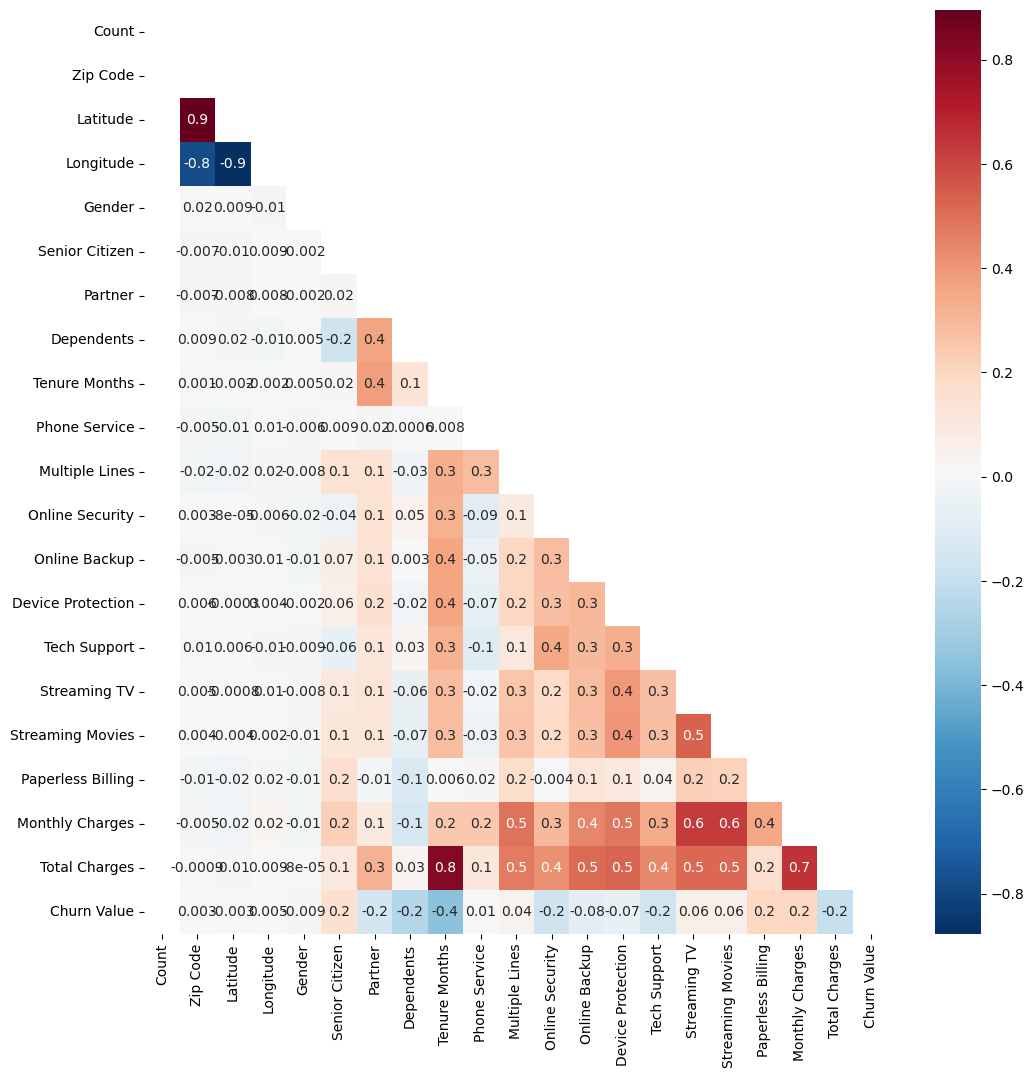

In [419]:
matrix = df.corr(numeric_only=True)

plt.figure(figsize = (12, 12))
sns.heatmap(matrix,
            cmap = 'RdBu_r',
            annot=True,
            fmt = '.1',
            mask = np.triu(matrix))

plt.show()

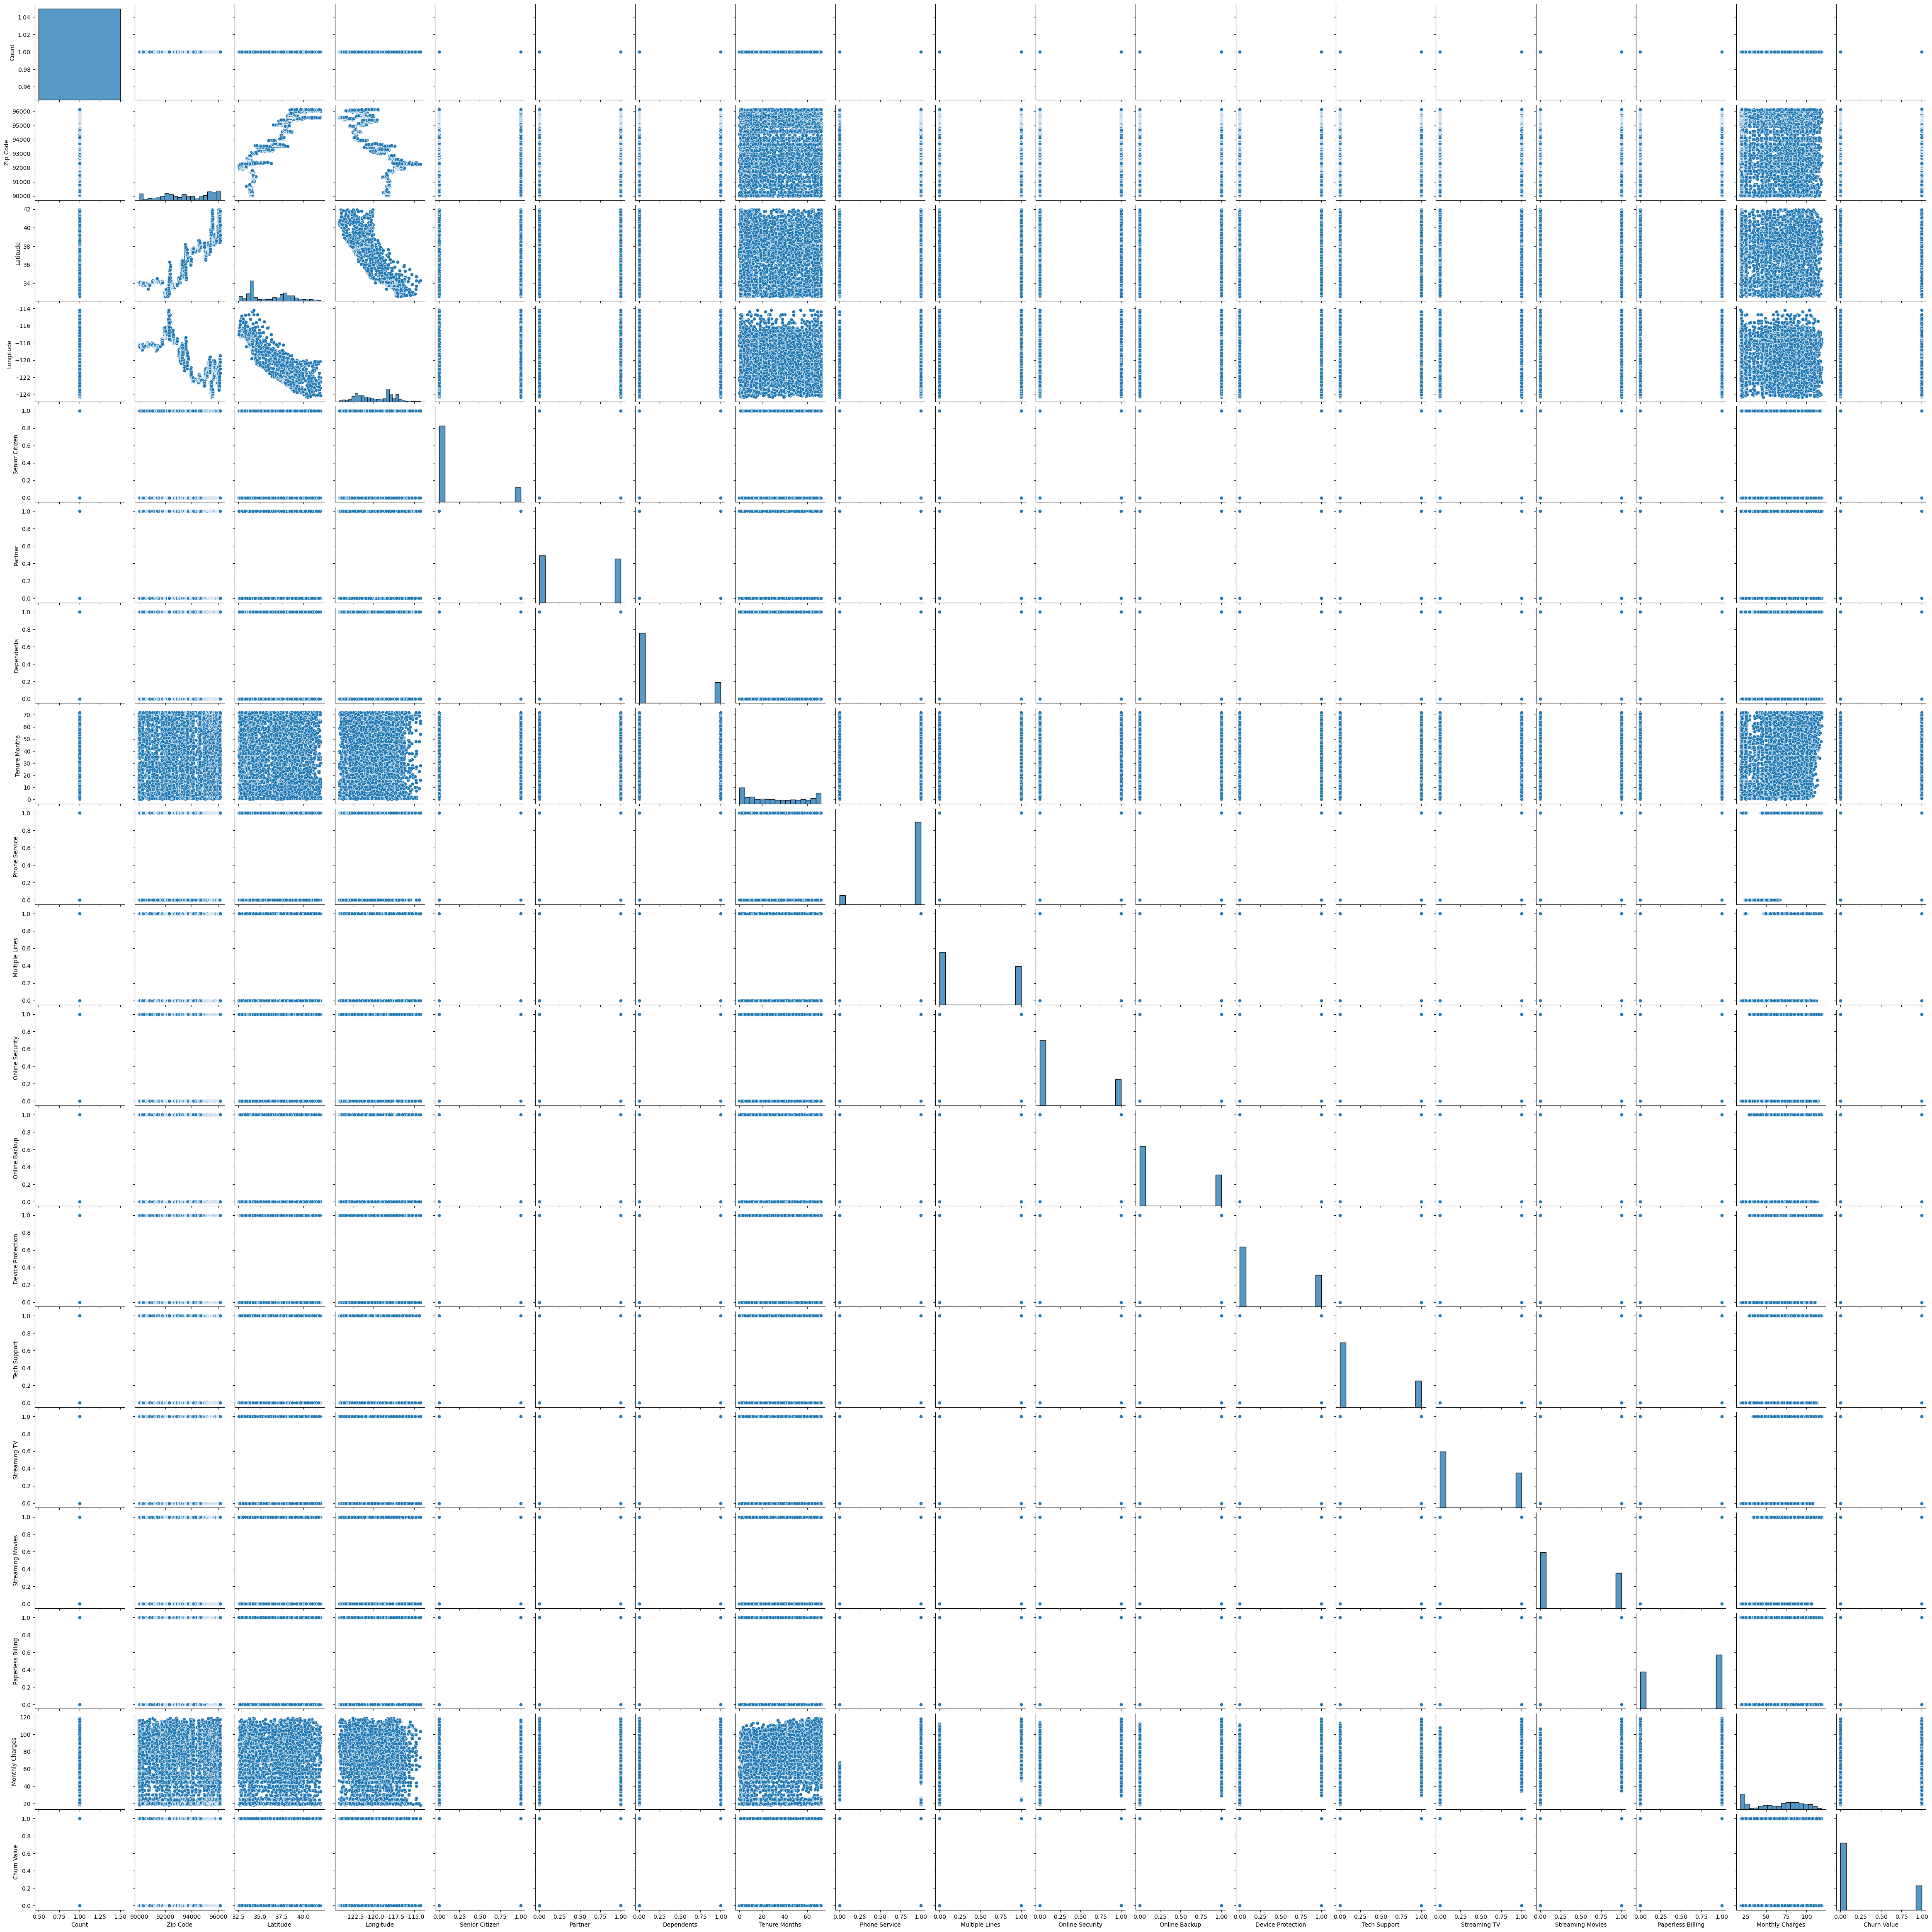

In [103]:
sns.pairplot(df)

In [420]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [421]:
features = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value']

In [422]:
df_model = df[features].copy()

In [423]:
df_model

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
1,0,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
2,0,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
3,0,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
4,1,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),21.15,1419.40,0
7039,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7040,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7041,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0


In [424]:
df_model = pd.get_dummies(data = df_model, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype=int)
df_model = pd.get_dummies(data = df_model, columns = ['Contract'], prefix='Con', drop_first=False, dtype=int)
df_model = pd.get_dummies(data = df_model, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype=int)

In [425]:
df_model

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,IS_DSL,IS_Fiber optic,IS_No,Con_Month-to-month,Con_One year,Con_Two year,Pay_Bank transfer (automatic),Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7039,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7040,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7041,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [562]:
df_model.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Con_Month-to-month',
       'Con_One year', 'Con_Two year', 'Pay_Bank transfer (automatic)',
       'Pay_Credit card (automatic)', 'Pay_Electronic check',
       'Pay_Mailed check'],
      dtype='object')

In [705]:
X = df_model[['Tenure Months', 'Total Charges', 'Monthly Charges', 'Con_Month-to-month', 
        'Con_Two year', 'Dependents', 'IS_Fiber optic', 'Pay_Electronic check', 
        'IS_No', 'Con_One year', 'Online Security', 'Paperless Billing', 
        'Tech Support', 'IS_DSL', 'Partner', 'Multiple Lines', 'Streaming TV', 
        'Streaming Movies', 'Gender', 'Senior Citizen', 'Online Backup', 
        'Device Protection', 'Pay_Credit card (automatic)', 
        'Pay_Bank transfer (automatic)', 'Pay_Mailed check', 'Phone Service']]
y = df_model['Churn Value']

In [706]:
importance_df = pd.DataFrame({
    'Feature': [
    'Con_Two year',
    'Multiple Lines',
    'Partner',
    'Senior Citizen',
    'Streaming Movies',
    'Con_Month-to-month',
    'Device Protection',
    'Gender',
    'IS_DSL',
    'Pay_Electronic check',
    'Online Security',
    'Monthly Charges',
    'Tenure Months',
    'Online Backup',
    'Streaming TV',
    'IS_Fiber optic',
    'Paperless Billing',
    'Tech Support',
    'IS_No',
    'Total Charges',
    'Con_One year',
    'Dependents'
],
    'Importance': [
    0.16276936646795734,
    0.14047463349760464,
    0.1270379926099821,
    0.11216674852168058,
    0.05391643246889274,
    0.049381796003819006,
    0.0377202937233949,
    0.024822718037044115,
    0.023518768042120552,
    0.01930557278582952,
    0.01783008590562598,
    0.017034697809360635,
    0.016190961494870097,
    0.01551360752590883,
    0.015468956246418385,
    0.015220870318079007,
    0.013635500055645072,
    0.013530152363008334,
    0.013471554874192554,
    0.012543312830619158,
    0.011460942494370924,
    0.006041310729470698
]
})

# Set the threshold for feature importance
threshold = 0.03

# Select features above the threshold
important_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()

# Update the feature set
X_important = X[important_features]

In [724]:
feature_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Con_Month-to-month',
       'Con_One year', 'Con_Two year', 'Pay_Bank transfer (automatic)',
       'Pay_Credit card (automatic)', 'Pay_Electronic check',
       'Pay_Mailed check']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [725]:
rf = RandomForestClassifier() # Random Forest
et = ExtraTreesClassifier(n_estimators=50) # Extra (Randomised) Trees Classifier

In [745]:
## Check respective cross validation scores if overfitting need to tune as shown below

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
 
#Step 1: Select parameters
rf_params = {
    'n_estimators': [100, 150, 200], # number of trees in the forest- 3 options
    'max_depth': [5], # 6 options
    'min_samples_split': [4],
    'min_samples_leaf': [2]
}

# Create a grid search object

gs = GridSearchCV(rf, param_grid=rf_params, cv=10, verbose = 1) # k = 5

# Fit grid search on the training set

gs.fit(X_train, y_train)

# Save my best model as a random forest model

best_rf = gs.best_estimator_

# I use the model to predict on X_train

y_pred = best_rf.predict(X_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [746]:
best_rf

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=200)

In [747]:
y_test_pred = best_rf.predict(X_test)

In [748]:
def apr(y_pred, y_real):

    accuracy = metrics.accuracy_score(y_real, y_pred)

    precision = metrics.precision_score(y_real, y_pred)

    recall = metrics.recall_score(y_real, y_pred)

    f1 = metrics.f1_score(y_real, y_pred)

    

    print(f"Accuracy:{accuracy}")

    print(f"Precision:{precision}")

    print(f"Recall:{recall}")

    print(f"F1:{f1}")

    return accuracy, precision, recall, f1

In [749]:
apr(y_pred, y_train)

Accuracy:0.8109691160809371
Precision:0.7144373673036093
Recall:0.45813478556841386
F1:0.5582745748652012


(0.8109691160809371,
 0.7144373673036093,
 0.45813478556841386,
 0.5582745748652012)

In [750]:
apr(y_test_pred, y_test)

Accuracy:0.7913413768630234
Precision:0.7054263565891473
Recall:0.455
F1:0.5531914893617021


(0.7913413768630234, 0.7054263565891473, 0.455, 0.5531914893617021)

In [738]:
sorted(list(zip(X_important.columns, best_rf.feature_importances_)), key = lambda x: x[1], reverse = True)

[('Senior Citizen', 0.20968941161724194),
 ('Con_Two year', 0.17470608717149239),
 ('Device Protection', 0.1187698702909201),
 ('Multiple Lines', 0.08740123837085603),
 ('Partner', 0.06981165986100793),
 ('Streaming Movies', 0.06680572477605164),
 ('Con_Month-to-month', 0.05692400786047175)]

## Initial Values (All of these are on train data)
Accuracy:0.8097266595669151
Precision:0.7212931995540691
Recall:0.4404356705241661
F1:0.5469146238377007


('Gender', 0.0008502032025706071), ('Senior Citizen', 0.0033135880774786217), ('Partner', 0.0030155971832734577), ('Dependents', 0.05982234224660753), ('Tenure Months', 0.14255536835763907), ('Phone Service', 0.002809454722752085), ('Multiple Lines', 0.004028109185785082), ('Online Security', 0.018325023399959034), ('Online Backup', 0.0031842881694732436), ('Device Protection', 0.0019138671100342734), ('Tech Support', 0.00984263074562886), ('Streaming TV', 0.004920603262849492), ('Streaming Movies', 0.0045091244144236965), ('Paperless Billing', 0.015258970845224384), ('Monthly Charges', 0.07785665632801977), ('Total Charges', 0.08065829416694027), ('IS_DSL', 0.014820530332750135), ('IS_Fiber optic', 0.11732817076612559), ('IS_No', 0.03139188405454002), ('Con_Month-to-month', 0.22566269029934538), ('Con_One year', 0.031715320230712316), ('Con_Two year', 0.08017764908542549), ('Pay_Bank transfer (automatic)', 0.0011768833654449329), ('Pay_Credit card (automatic)', 0.001805157316184554), ('Pay_Electronic check', 0.060750144124646153), ('Pay_Mailed check', 0.0023074490061660777)

## Values if drop first OHE

Accuracy:0.8044018459353922
Precision:0.7146198830409357
Recall:0.415929203539823
F1:0.5258175559380378

('Gender', 0.0012528873825234368), ('Senior Citizen', 0.00614121860354962), ('Partner', 0.005024005853119256), ('Dependents', 0.06961156498114633), ('Tenure Months', 0.22288322392749987), ('Phone Service', 0.0031265703585258314), ('Multiple Lines', 0.003637523408640956), ('Online Security', 0.016695302851747872), ('Online Backup', 0.005279040748542838), ('Device Protection', 0.004035929705086319), ('Tech Support', 0.02000769958388914), ('Streaming TV', 0.004269206306477633), ('Streaming Movies', 0.003640246165728599), ('Paperless Billing', 0.024227924402750366), ('Monthly Charges', 0.07812585719070707), ('Total Charges', 0.10707480389406918), ('IS_Fiber optic', 0.1415179331255288), ('IS_No', 0.04874436208198521), ('Con_One year', 0.02627521629980202), ('Con_Two year', 0.09693846018686886), ('Pay_Credit card (automatic)', 0.005429774367727628), ('Pay_Electronic check', 0.10370261157906795), ('Pay_Mailed check', 0.0023586369950151856)

## Values if using:
rf_params = {

    'criterion': ['gini', 'entropy'],
    
    'n_estimators': [150],

    'max_depth': [None, 1, 2, 3, 4, 5],

    'min_samples_split': [2,3,4,5],

    'min_samples_leaf': [2,3,4,5]
}

Accuracy:0.8766418175363863
Precision:0.8290816326530612
Recall:0.6637168141592921
F1:0.7372400756143667
(0.8766418175363863,
 0.8290816326530612,
 0.6637168141592921,
 0.7372400756143667)

('Gender', 0.0010455088047067464), ('Senior Citizen', 0.007237243523909439), ('Partner', 0.002526886317185936), ('Dependents', 0.057058082851892976), ('Tenure Months', 0.18093045966507432), ('Phone Service', 0.002361651344990941), ('Multiple Lines', 0.004267992311755161), ('Online Security', 0.01895156138705637), ('Online Backup', 0.0032617282125975288), ('Device Protection', 0.0012626272134806692), ('Tech Support', 0.01194147517062798), ('Streaming TV', 0.00480071098967445), ('Streaming Movies', 0.004087651776393718), ('Paperless Billing', 0.01650166410238272), ('Monthly Charges', 0.07601434113260953), ('Total Charges', 0.0738495607488957), ('IS_DSL', 0.020672729844760308), ('IS_Fiber optic', 0.1031962882169271), ('IS_No', 0.03661924825077132), ('Con_Month-to-month', 0.18874279711373673), ('Con_One year', 0.022502090882270336), ('Con_Two year', 0.07617141625529678), ('Pay_Bank transfer (automatic)', 0.001437333040170593), ('Pay_Credit card (automatic)', 0.0026027281856158165), ('Pay_Electronic check', 0.07953269238006298), ('Pay_Mailed check', 0.0024235302771538373)

## Value if using:
(criterion='entropy', 
min_samples_leaf=5,
min_samples_split=3, 
n_estimators=150, 
max_depth: None, 1, 2, 3, 4, 5)

Accuracy:0.8750443734469293
Precision:0.8272027373823782
Recall:0.6582709326072158
F1:0.7331311599696742
(0.8750443734469293,
 0.8272027373823782,
 0.6582709326072158,
 0.7331311599696742)

('Gender', 0.016666436568335396), ('Senior Citizen', 0.011015597622271034), ('Partner', 0.01645333256339627), ('Dependents', 0.0601678017987114), ('Tenure Months', 0.14616508806529274), ('Phone Service', 0.005274343641137804), ('Multiple Lines', 0.013135995645838307), ('Online Security', 0.016670535403629706), ('Online Backup', 0.012196514993712111), ('Device Protection', 0.011181380927125253), ('Tech Support', 0.014958184031314133), ('Streaming TV', 0.013031090693153535), ('Streaming Movies', 0.014959473962190419), ('Paperless Billing', 0.021156777349774062), ('Monthly Charges', 0.12257440011620506), ('Total Charges', 0.13527377356661766), ('IS_DSL', 0.013485878411111521), ('IS_Fiber optic', 0.05520937602136143), ('IS_No', 0.02156626699476809), ('Con_Month-to-month', 0.13745674410996683), ('Con_One year', 0.01892858433064513), ('Con_Two year', 0.05808721777416591), ('Pay_Bank transfer (automatic)', 0.008285932372777043), ('Pay_Credit card (automatic)', 0.007918831559305915), ('Pay_Electronic check', 0.040092480943274354), ('Pay_Mailed check', 0.008087960533918997)

## Values if using:
rf_params = {

    'criterion': ['gini', 'entropy'],
    
    'n_estimators': [150],

    'max_depth': [None],

    'min_samples_split': [3],

    'min_samples_leaf': [5]
}

Accuracy:0.8762868299609514
Precision:0.8287904599659285
Recall:0.6623553437712729
F1:0.736284525160802
(0.8762868299609514, 0.8287904599659285, 0.6623553437712729, 0.736284525160802)

('Gender', 0.015352755959415513), ('Senior Citizen', 0.012276492736973982), ('Partner', 0.016080292543037313), ('Dependents', 0.04854332923983563), ('Tenure Months', 0.17813760419987842), ('Phone Service', 0.005597919869104209), ('Multiple Lines', 0.013524615790123354), ('Online Security', 0.01924800005154501), ('Online Backup', 0.01273300643595368), ('Device Protection', 0.01037876715416629), ('Tech Support', 0.01602608292988543), ('Streaming TV', 0.012719821431480177), ('Streaming Movies', 0.012447247482469895), ('Paperless Billing', 0.0211883414991183), ('Monthly Charges', 0.13129103996390612), ('Total Charges', 0.14235632695873082), ('IS_DSL', 0.015604546792096403), ('IS_Fiber optic', 0.0648275457338965), ('IS_No', 0.02139426204022734), ('Con_Month-to-month', 0.11093408380972036), ('Con_One year', 0.012262403742306268), ('Con_Two year', 0.04116502412254899), ('Pay_Bank transfer (automatic)', 0.006418786660949602), ('Pay_Credit card (automatic)', 0.006651754651123602), ('Pay_Electronic check', 0.04607586675901946), ('Pay_Mailed check', 0.006764081442487364)

# Logistic Regression

In [357]:
df_x = df.drop('Churn Value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df['Churn Value'], test_size = 0.2, random_state = 42)

In [358]:
def feature_eng(dataframe):
    
    # Make a copy of dataframe
    df = dataframe.copy()
    
    ##### Mapping columns #######
    # list of columns with yes's and no's
    yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
    # mapping these columns
    for col in yn_cols:
        df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0, 0:0})
        df[f'{col}'].astype(int)
    # mapping gender column
    df['Gender'] = df['Gender'].map({'Male':0, 'Female': 1})
    

# 'Monthly Charges', 'Total Charges', 'IS_DSL', 'Device Protection'- Dropping to reduce noise
    ###### OHE ###############
    df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Con', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype = int)

###### Drop Columns #########
    df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
            'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason',
            ], axis = 1, inplace = True)
   
# Churn Reason has nulls
#     df['Churn Reason'] = df['Churn Reason'].fillna(value = 'None')
#   df = pd.get_dummies(data = df, columns = ['Churn Reason'], prefix='Reason', drop_first=True, dtype = int)

    
    ##### Target Columns - hidden nulls in diguise 
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

    # Fills nulls with zeros 
    df['Total Charges'] = df['Total Charges'].fillna(value = 0)
    
    return df

In [359]:
X_train_fe.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'IS_Fiber optic', 'IS_No',
       'Con_Month-to-month', 'Con_Two year', 'Pay_Credit card (automatic)',
       'Pay_Electronic check', 'prob_stay', 'prob_churn', 'y_pred'],
      dtype='object')

In [360]:
X_train_fe = feature_eng(X_train)

In [361]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [362]:
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [363]:
X_train_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_train_fe)

In [364]:
X_train_fe['y_pred'] = np.where(X_train_fe['prob_churn']>.5, 1, 0)

In [365]:
print(metrics.confusion_matrix(y_train, X_train_fe['y_pred']))

[[3739  426]
 [ 619  850]]


In [366]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [367]:
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for your predictions is:
[[3739  426]
 [ 619  850]] 

The accuracy of your model is: 0.8145189918352858
The recall of your model is: 0.5786249149081008
The precision of your model is: 0.6661442006269592
The F1-score of your model is: 0.6193078324225865


In [368]:
X_test_fe = feature_eng(X_test)

In [369]:
X_test_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_test_fe)

In [390]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_churn']>.6, 1, 0)

In [391]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for your predictions is:
[[949  60]
 [221 179]] 

The accuracy of your model is: 0.8005677785663591
The recall of your model is: 0.4475
The precision of your model is: 0.7489539748953975
The F1-score of your model is: 0.5602503912363068


In [392]:
print(list(zip(X_train_fe.columns, lr.coef_[0])))

[('Gender', 0.08013395818640903), ('Senior Citizen', 0.2925714905440578), ('Partner', 0.07778199966957525), ('Dependents', -1.0641041480925435), ('Tenure Months', -0.07208569755645834), ('Phone Service', -0.6148796340288183), ('Multiple Lines', 0.23455426535778315), ('Online Security', -0.4629031983212243), ('Online Backup', -0.11442300110608396), ('Device Protection', -0.03337118967532489), ('Tech Support', -0.45338698266953426), ('Streaming TV', 0.1254250050059897), ('Streaming Movies', 0.08418729031518651), ('Paperless Billing', 0.5193739602179284), ('Monthly Charges', 0.004820180553088367), ('Total Charges', 0.0004329870202941056), ('IS_DSL', 0.0024332215090326205), ('IS_Fiber optic', 0.29042710892660156), ('IS_No', -0.611262768174904), ('Con_Month-to-month', 0.5020649405037424), ('Con_One year', -0.26692543923668194), ('Con_Two year', -0.5535419390063506), ('Pay_Bank transfer (automatic)', -0.08171571884673873), ('Pay_Credit card (automatic)', -0.22654265276139332), ('Pay_Electron

In [393]:
sorted(list(zip(X_train_fe.columns, lr.coef_[0])), key = lambda x: x[1], reverse = True)

[('Paperless Billing', 0.5193739602179284),
 ('Con_Month-to-month', 0.5020649405037424),
 ('Senior Citizen', 0.2925714905440578),
 ('IS_Fiber optic', 0.29042710892660156),
 ('Pay_Electronic check', 0.24879894910392128),
 ('Multiple Lines', 0.23455426535778315),
 ('Streaming TV', 0.1254250050059897),
 ('Streaming Movies', 0.08418729031518651),
 ('Gender', 0.08013395818640903),
 ('Partner', 0.07778199966957525),
 ('Monthly Charges', 0.004820180553088367),
 ('IS_DSL', 0.0024332215090326205),
 ('Total Charges', 0.0004329870202941056),
 ('Device Protection', -0.03337118967532489),
 ('Tenure Months', -0.07208569755645834),
 ('Pay_Bank transfer (automatic)', -0.08171571884673873),
 ('Online Backup', -0.11442300110608396),
 ('Pay_Credit card (automatic)', -0.22654265276139332),
 ('Pay_Mailed check', -0.2589430152351061),
 ('Con_One year', -0.26692543923668194),
 ('Tech Support', -0.45338698266953426),
 ('Online Security', -0.4629031983212243),
 ('Con_Two year', -0.5535419390063506),
 ('IS_No',

## If drop these extra columns:
'Monthly Charges', 'Total Charges', 'IS_DSL', 'Device Protection',
'Tenure Months', 'Con_One year', 'Gender', 'Online Backup', 'Pay_Mailed check', 'Pay_Bank transfer (automatic)'

Then get values of:
## Train
The confusion matrix for your predictions is:
[[3669  496]
 [ 642  827]] 

The accuracy of your model is: 0.7980120695775648
The recall of your model is: 0.5629680054458815
The precision of your model is: 0.6250944822373394
The F1-score of your model is: 0.592406876790831

[('Con_Month-to-month', 1.287764586576203),
 ('IS_Fiber optic', 0.6333072649612081),
 ('Pay_Electronic check', 0.34074527690642153),
 ('Paperless Billing', 0.3285491708980389),
 ('Streaming TV', 0.14393274114952456),
 ('Streaming Movies', 0.03738241761785884),
 ('Senior Citizen', -0.015410441290362132),
 ('Multiple Lines', -0.01653097978686826),
 ('Partner', -0.03660882516133229),
 ('Phone Service', -0.17346908937885525),
 ('Pay_Credit card (automatic)', -0.27238215194513327),
 ('Tech Support', -0.42627661378963927),
 ('Online Security', -0.56854488512028),
 ('IS_No', -0.8689561056095657),
 ('Con_Two year', -1.1230502980444077),
 ('Dependents', -1.3883863359542101)]

## TEST
The confusion matrix for your predictions is:
[[874 135]
 [163 237]] 

The accuracy of your model is: 0.7885024840312278
The recall of your model is: 0.5925
The precision of your model is: 0.6370967741935484
The F1-score of your model is: 0.6139896373056996
print(list(zip(X_train_fe.columns, lr.coef_[0])))


In [753]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN


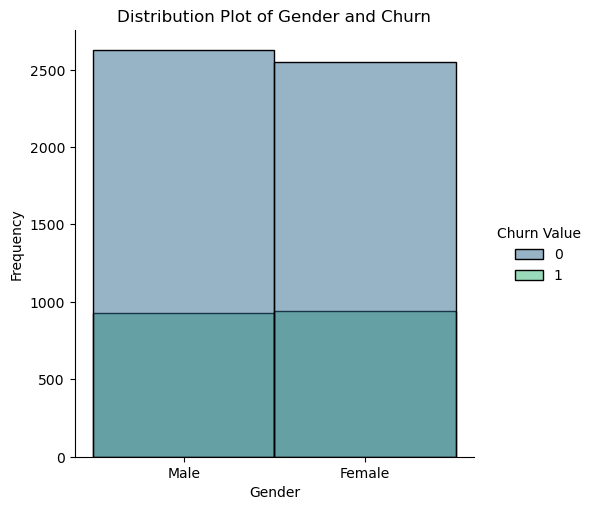

In [766]:
sns.displot(data=df, x='Gender', hue='Churn Value', kind='hist',  palette='viridis', bins=20)
plt.title('Distribution Plot of Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

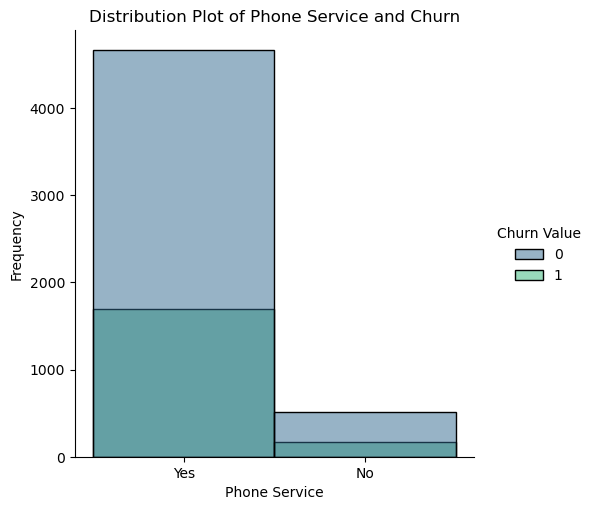

In [767]:
sns.displot(data=df, x='Phone Service', hue='Churn Value', kind='hist',  palette='viridis', bins=20)
plt.title('Distribution Plot of Phone Service and Churn')
plt.xlabel('Phone Service')
plt.ylabel('Frequency')
plt.show()

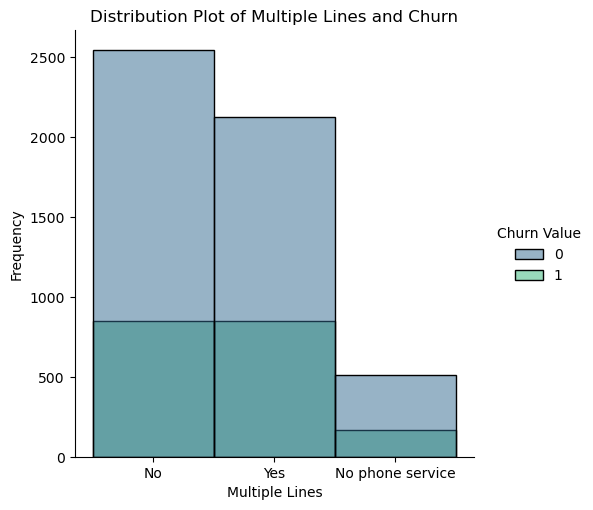

In [768]:
sns.displot(data=df, x='Multiple Lines', hue='Churn Value', kind='hist',  palette='viridis', bins=20)
plt.title('Distribution Plot of Multiple Lines and Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Frequency')
plt.show()

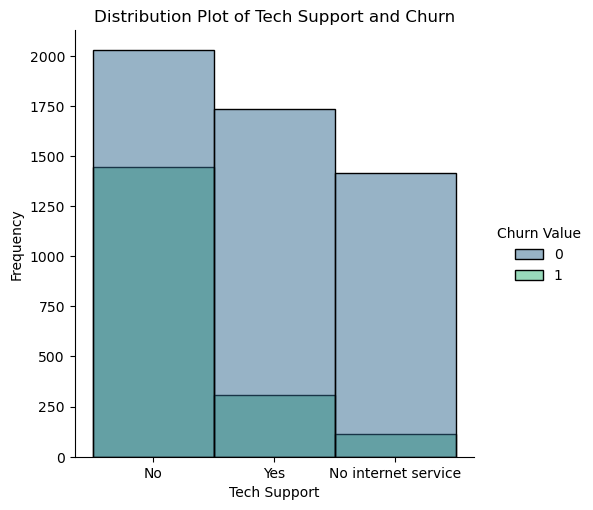

In [769]:
sns.displot(data=df, x='Tech Support', hue='Churn Value', kind='hist',  palette='viridis', bins=20)
plt.title('Distribution Plot of Tech Support and Churn')
plt.xlabel('Tech Support')
plt.ylabel('Frequency')
plt.show()

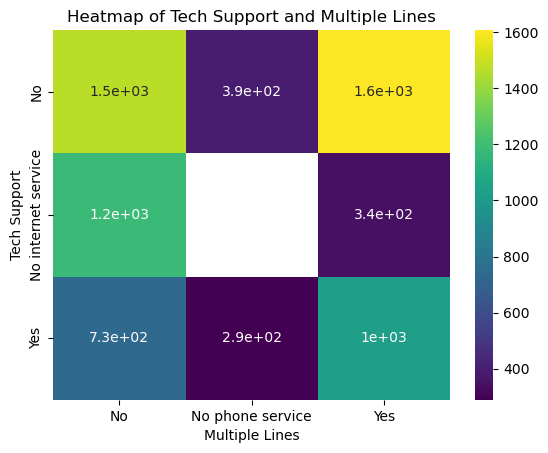

In [775]:
pivot_table = df.pivot_table(values='Churn Value', index='Tech Support', columns='Multiple Lines', aggfunc='count')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap of Tech Support and Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Tech Support')
plt.show()

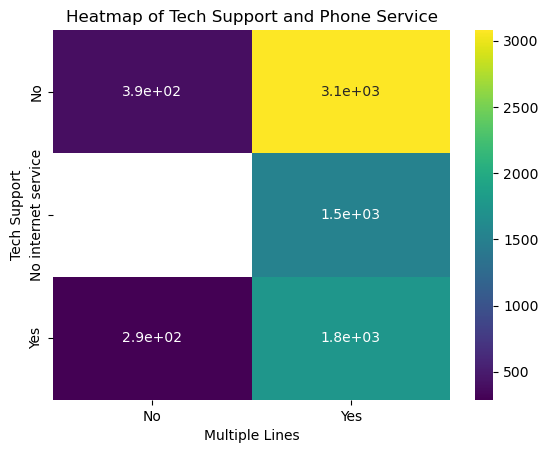

In [778]:
pivot_table = df.pivot_table(values='Churn Value', index='Tech Support', columns='Phone Service', aggfunc='count')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap of Tech Support and Phone Service')
plt.xlabel('Multiple Lines') # Change
plt.ylabel('Tech Support')
plt.show()

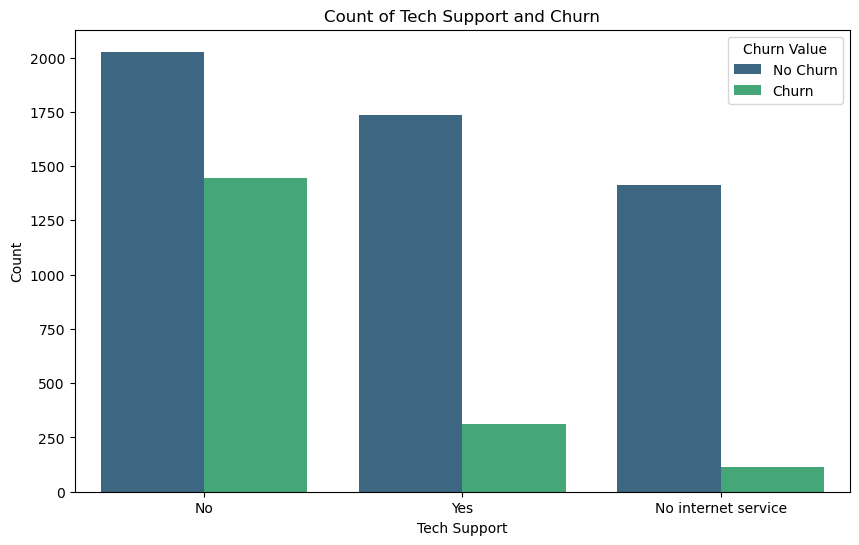

In [781]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tech Support', hue='Churn Value', palette='viridis')
plt.title('Count of Tech Support and Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn Value', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

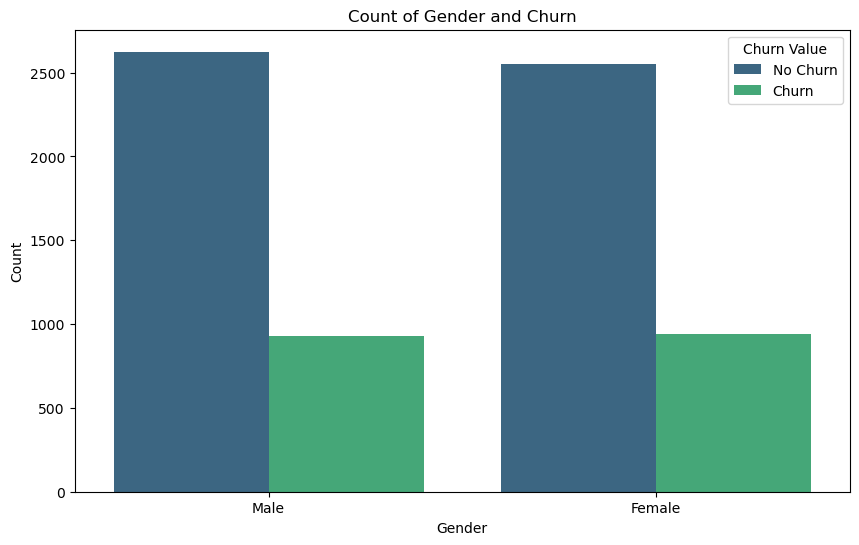

In [783]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Churn Value', palette='viridis')
plt.title('Count of Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn Value', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

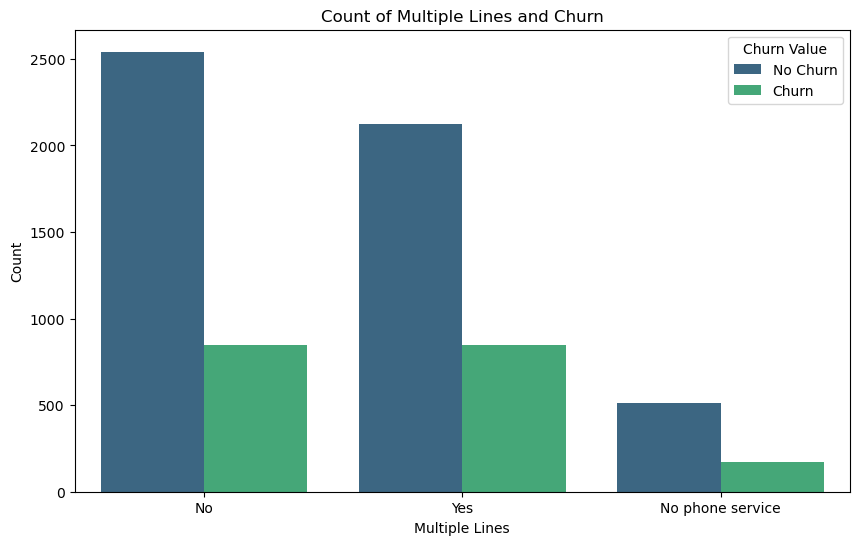

In [784]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Multiple Lines', hue='Churn Value', palette='viridis')
plt.title('Count of Multiple Lines and Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn Value', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

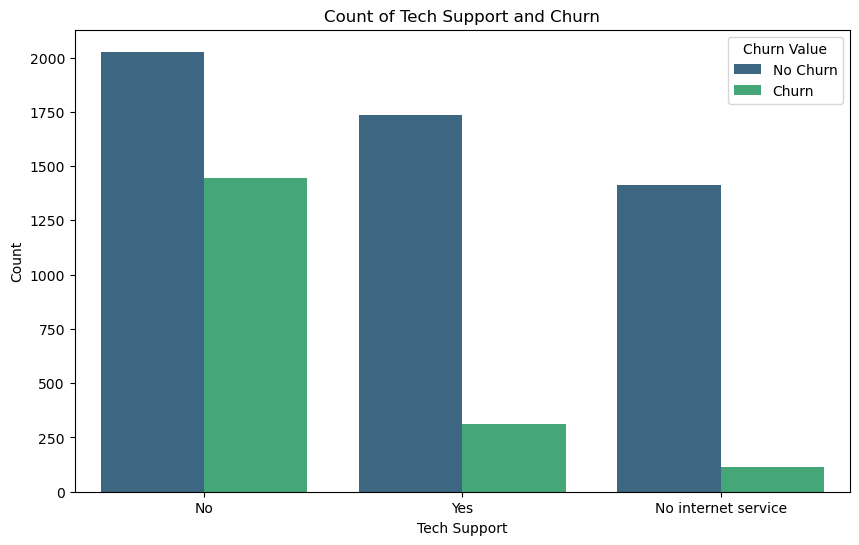

In [785]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tech Support', hue='Churn Value', palette='viridis')
plt.title('Count of Tech Support and Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn Value', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

In [786]:
filtered_df = df[(df['Tech Support'] == 'No') & (df['Churn Value'] == 1)]

In [787]:
filtered_df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,Competitor offered more data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,1122-JWTJW,1,United States,California,Ocotillo,92259,"32.698964, -115.886656",32.698964,-115.886656,Male,...,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,1,Competitor had better devices
1865,8775-CEBBJ,1,United States,California,Seeley,92273,"32.790282, -115.689559",32.790282,-115.689559,Female,...,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,Competitor offered higher download speeds
1866,6894-LFHLY,1,United States,California,Vidal,92280,"34.264124, -114.717964",34.264124,-114.717964,Male,...,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1,Competitor offered higher download speeds
1867,0639-TSIQW,1,United States,California,White Water,92282,"33.972293, -116.654195",33.972293,-116.654195,Female,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,Competitor offered more data


In [791]:
churn_reason_counts = filtered_df['Churn Reason'].value_counts().sort_values(ascending=False)
churn_reason_counts

Churn Reason
Competitor offered higher download speeds    149
Attitude of support person                   146
Competitor offered more data                 126
Don't know                                   118
Competitor made better offer                 107
Competitor had better devices                104
Attitude of service provider                 102
Product dissatisfaction                       80
Network reliability                           80
Price too high                                76
Lack of self-service on Website               74
Service dissatisfaction                       69
Extra data charges                            45
Moved                                         37
Long distance charges                         35
Limited range of services                     35
Lack of affordable download/upload speed      28
Poor expertise of phone support               15
Poor expertise of online support              14
Deceased                                       6
Name: c

/var/folders/md/qszqkzy929909bzx2dgdwr_h0000gn/T/ipykernel_96668/280458932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y='Churn Reason', palette='viridis_r', order = churn_reason_counts.index)


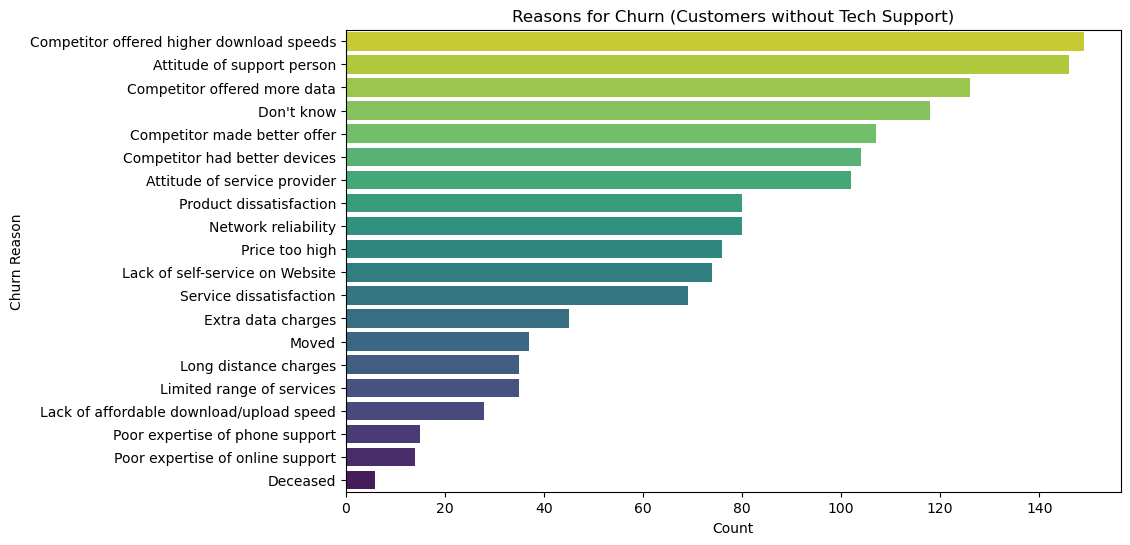

In [793]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, y='Churn Reason', palette='viridis_r', order = churn_reason_counts.index)
plt.title('Reasons for Churn (Customers without Tech Support)')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.show()